<a href="https://colab.research.google.com/github/guard1000/edu_vis/blob/main/%EC%8B%A4%EC%8A%B56_Teachable_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [실습6] Teachable Machine 활용하기



### 학습 목표
---
- Teachable Machine으로 딥러닝 모델을 학습시키기
- Teachable Machine의 Output을 활용하는 코드를 작성하기
- Teachable Machine의 Output Model을 사용해 강아지/고양이 분류 모델 만들기


실습에 활용할 다음 데이터들을 좌측 세션 저장소에 먼저 업로드 해 주세요.<br/>
- 실습6_Teachable machine_Data/test 폴더 내 이미지 파일들
- teachable machine에서 "모델 다운로드"로 받은 keras_model.h5 파일

In [ ]:
# 필요한 라이브러리 불러오기
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

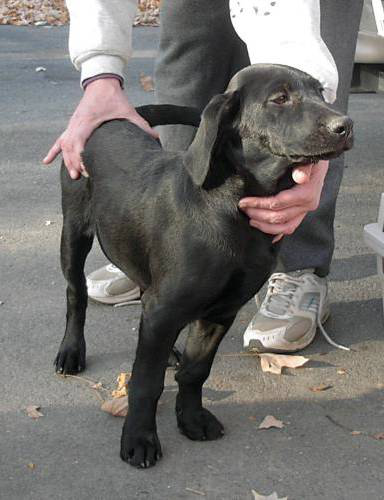

In [ ]:
# 테스트용 이미지를 plt로 확인해 보기
img_path = '/content/1.jpg'
Image.open(img_path)

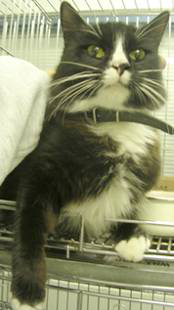

In [ ]:
# 테스트용 이미지를 plt로 확인해 보기 2
img_path = '/content/7.jpg'
Image.open(img_path)

In [ ]:
# Teachable Machine에서 학습시킨 model 불러오기
model = """ Your Answer """ # load_model 메서드 사용

keras 모델에 입력할 올바른 모양의 array를 만듭니다. <br/>
배열에 넣을 수 있는 '이미지 수'는 모양 tuple의 첫 번째 pos에 의해 결정됩니다(이 경우 1). <br/> <br/>

모델에 들어갈 inp는 1개의 224x224 사이즈의 컬러 이미지입니다.

In [ ]:
inp = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
# 모델에게 분류시킬 이미지를 지정합니다.
img_path = '/content/7.jpg'
image = Image.open(img_path)

In [ ]:
# ImageOps를 활용해 모델 인풋에 맞는 사이즈(224x224)로 resizing 및 중앙 cropping 해 줍니다.
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

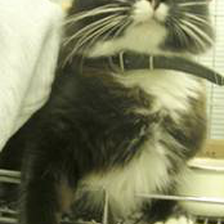

In [ ]:
image

In [ ]:
# 이미지를 numpy array로 형변환 해 줍니다.
image_array = np.asarray(image)

In [ ]:
image_array

array([[[249, 252, 233],
        [249, 252, 233],
        [249, 252, 233],
        ...,
        [241, 246, 219],
        [240, 247, 221],
        [242, 248, 222]],

       [[248, 251, 231],
        [249, 252, 232],
        [249, 252, 233],
        ...,
        [243, 248, 222],
        [242, 249, 223],
        [244, 250, 224]],

       [[246, 249, 230],
        [247, 250, 231],
        [248, 251, 233],
        ...,
        [250, 254, 229],
        [249, 254, 228],
        [249, 254, 229]],

       ...,

       [[ 75,  78,  54],
        [ 78,  80,  56],
        [ 81,  84,  59],
        ...,
        [ 83,  81,  60],
        [ 73,  70,  52],
        [ 74,  71,  53]],

       [[ 58,  59,  43],
        [ 61,  62,  46],
        [ 66,  66,  50],
        ...,
        [ 66,  62,  55],
        [ 50,  44,  41],
        [ 47,  42,  39]],

       [[ 50,  51,  35],
        [ 51,  52,  36],
        [ 52,  53,  36],
        ...,
        [ 64,  62,  32],
        [ 38,  37,   9],
        [ 33,  31,   4]]

In [ ]:
# 이미지를 정규화해 줍니다.
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

In [ ]:
normalized_image_array

array([[[ 0.96062994,  0.984252  ,  0.8346456 ],
        [ 0.96062994,  0.984252  ,  0.8346456 ],
        [ 0.96062994,  0.984252  ,  0.8346456 ],
        ...,
        [ 0.89763784,  0.9370079 ,  0.72440946],
        [ 0.88976383,  0.9448819 ,  0.7401575 ],
        [ 0.90551186,  0.9527559 ,  0.7480315 ]],

       [[ 0.9527559 ,  0.97637796,  0.8188976 ],
        [ 0.96062994,  0.984252  ,  0.8267716 ],
        [ 0.96062994,  0.984252  ,  0.8346456 ],
        ...,
        [ 0.91338587,  0.9527559 ,  0.7480315 ],
        [ 0.90551186,  0.96062994,  0.7559055 ],
        [ 0.9212599 ,  0.96850395,  0.7637795 ]],

       [[ 0.9370079 ,  0.96062994,  0.8110236 ],
        [ 0.9448819 ,  0.96850395,  0.8188976 ],
        [ 0.9527559 ,  0.97637796,  0.8346456 ],
        ...,
        [ 0.96850395,  1.        ,  0.8031496 ],
        [ 0.96062994,  1.        ,  0.79527557],
        [ 0.96062994,  1.        ,  0.8031496 ]],

       ...,

       [[-0.4094488 , -0.38582677, -0.5748031 ],
        [-0

In [ ]:
# 모델에게 입력으로 넣을 inp에 위 이미지 데이터를 넣어줍니다.
inp[0] = normalized_image_array

In [ ]:
# 모델 예측
prediction = model.predict(inp)
print(prediction)

[[9.9980444e-01 1.9553090e-04]]


In [ ]:
# Teachable Machine output 중 하나인 labels.txt를 참고하면
# 0번 레이블은 Cats, 1번 레이블은 Dogs 입니다.
# 예측 결과를 더 보기 좋게 바꿔줍시다.

labels = ['Cats', 'Dogs']
print('모델 예측 결과:', labels[np.argmax(prediction)])

모델 예측 결과: Cats


### 위 과정을 하나의 함수로 정리해 봅시다.



In [ ]:
def model_pred(img, model):
  size = (224, 224)
  labels = ['Cats', 'Dogs']

  # 우선 이미지를 보여줌
  plt.imshow(img)
  plt.axis('off')
  plt. show()

  # 모델 인풋 shape 정의
  inp = np.ndarray(""" Your Answer """)

  # ImageOps를 활용해 모델 인풋에 맞는 사이즈로 resizing 및 중앙 cropping 해 줍니다.
  img = ImageOps.""" Your Answer """
  img_array = np.asarray(img)

  # 이미지를 정규화해 줍니다.
  normalized_img_array = """ Your Answer """

  # 모델에게 입력으로 넣을 inp에 위 이미지 데이터를 넣어줍니다.
  inp[0] = """ Your Answer """

  # 모델 예측 및 결과
  prediction = model.predict(inp)
  print('모델 예측 결과:', labels[""" Your Answer """])

#### 분류 결과 확인하기

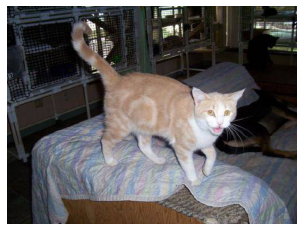

모델 예측 결과: Cats


In [ ]:
img_path = '/content/33.jpg'

img = Image.open(img_path)
model = load_model('/content/keras_model.h5')

model_pred(img, model)

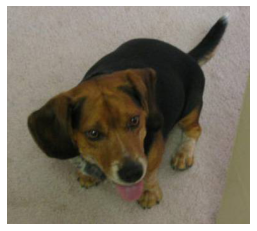

모델 예측 결과: Dogs


In [ ]:
img_path = '/content/28.jpg'

img = Image.open(img_path)
model = load_model('/content/keras_model.h5')

model_pred(img, model)

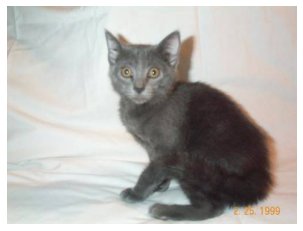

모델 예측 결과: Cats


In [ ]:
img_path = '/content/14.jpg'

img = Image.open(img_path)
model = load_model('/content/keras_model.h5')

model_pred(img, model)